In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Using TensorFlow backend.


In [2]:
img_width, img_height = 150, 150

In [3]:
train_data_dir = (r'C:\Users\mohak\Project\pothole_detection\train')
validation_data_dir = (r'C:\Users\mohak\Project\pothole_detection\validation')
nb_train_samples = 1056
nb_validation_samples = 130
epochs = 100
batch_size = 16

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1056 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 130 images belonging to 2 classes.


In [11]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/100
66/66 [==============================] - 36s 540ms/step - loss: 0.7069 - accuracy: 0.6856 - val_loss: 0.5801 - val_accuracy: 0.6484
Epoch 2/100
66/66 [==============================] - 23s 354ms/step - loss: 0.4143 - accuracy: 0.8314 - val_loss: 0.2847 - val_accuracy: 0.8772
Epoch 3/100
66/66 [==============================] - 24s 369ms/step - loss: 0.3975 - accuracy: 0.8504 - val_loss: 0.1782 - val_accuracy: 0.7895
Epoch 4/100
66/66 [==============================] - 24s 366ms/step - loss: 0.3401 - accuracy: 0.8589 - val_loss: 0.1588 - val_accuracy: 0.8860
Epoch 5/100
66/66 [==============================] - 25s 380ms/step - loss: 0.2843 - accuracy: 0.8883 - val_loss: 0.0172 - val_accuracy: 0.8596
Epoch 6/100
66/66 [==============================] - 27s 402ms/step - loss: 0.2781 - accuracy: 0.8968 - val_loss: 0.2653 - val_accuracy: 0.9035
Epoch 7/100
66/66 [==============================] - 26s 399ms/step - loss: 0.2909 - accuracy: 0.8873 - val_loss: 0.7792 - val_accuracy

66/66 [==============================] - 25s 372ms/step - loss: 0.1197 - accuracy: 0.9669 - val_loss: 2.4328 - val_accuracy: 0.8596
Epoch 57/100
66/66 [==============================] - 27s 411ms/step - loss: 0.1263 - accuracy: 0.9574 - val_loss: 1.0731 - val_accuracy: 0.8947
Epoch 58/100
66/66 [==============================] - 28s 418ms/step - loss: 0.0924 - accuracy: 0.9640 - val_loss: 0.0467 - val_accuracy: 0.8596
Epoch 59/100
66/66 [==============================] - 25s 373ms/step - loss: 0.1688 - accuracy: 0.9555 - val_loss: 0.1198 - val_accuracy: 0.8860
Epoch 60/100
66/66 [==============================] - 24s 365ms/step - loss: 0.1227 - accuracy: 0.9631 - val_loss: 1.5603 - val_accuracy: 0.8333
Epoch 61/100
66/66 [==============================] - 24s 357ms/step - loss: 0.1591 - accuracy: 0.9621 - val_loss: 0.0120 - val_accuracy: 0.9211
Epoch 62/100
66/66 [==============================] - 23s 342ms/step - loss: 0.1830 - accuracy: 0.9555 - val_loss: 0.2804 - val_accuracy: 0.859

In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


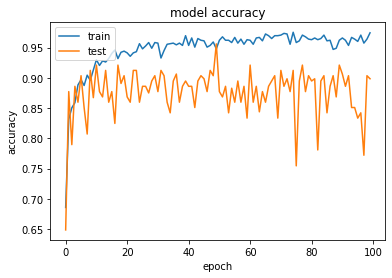

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

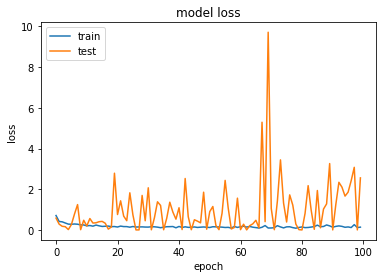

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save_weights('pothole_detection_using_T-GPU.h5')

In [16]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("pothole_detection.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("pothole_detection.h5")

In [17]:
from keras.models import load_model
from keras.models import model_from_json
import json

with open('pothole_detection.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('pothole_detection.h5')

In [19]:
from keras.preprocessing import image
import numpy as np
test_image =image.load_img('test_1.jfif',target_size =(150,150))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = model.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'pothole'
else:
    prediction = 'no pothole'
print(prediction)

pothole


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

Text(20, -22, 'pothole')

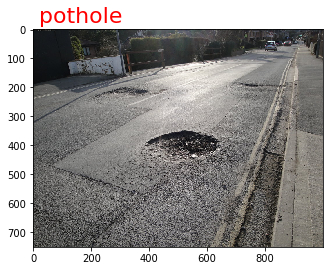

In [21]:
img=mpimg.imread('test_1.jfif')
fig,ax = plt.subplots(1)
ax.imshow(img)
plt.text(20,-22,prediction,fontsize='22',color='red')